In [1]:
# importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN


### 1. Carga de datos:
  * Descarga y carga el dataset «Credit Card Data» de Kaggle. Realiza una exploración inicial de las variables y observa cómo se distribuyen.
  * Este dataset incluye información sobre los comportamientos de clientes de tarjetas de crédito. Variables como el monto total de gastos, el número de compras y el saldo de la cuenta son de interés para el agrupamiento.

In [2]:
# cargamos el dataset
ruta='../data/CC GENERAL.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(8950, 18)

In [3]:
df.head() # mostramos las primeras 5 filas del dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info() # obtenemos informacion del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe().T # realizamos una estadistica escriptiva

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### 2. Exploración y preprocesamiento de datos:
  * Realiza una limpieza inicial de los datos, eliminando valores atípicos y manejando cualquier valor nulo presente en el dataset.
  * Estandariza las variables para asegurar que el rango de las características no afecte el rendimiento de los algoritmos de clustering.
  * Selecciona las características más relevantes para el análisis, como los montos de compras y la frecuencia de uso de la tarjeta.

In [6]:
df.duplicated().sum() # verificamos la existencia de valores duplicados

0

In [7]:
# verificamos la existencia de valores nulos en el DataFrame
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [8]:
# imputar los valores nulos por la media, por traarse de valores  limites de credito y pagos minimos
# Imputar valores nulos de la columna 'CREDIT_LIMIT' con la media
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

# Imputar valores nulos de la columna 'MINIMUM_PAYMENTS' con la media
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

/tmp/ipykernel_4730/927694267.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
/tmp/ipykernel_4730/927694267.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [9]:
# verificamos la existencia de valores nulos en el DataFrame despues de la imputacion
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [10]:
# excluimos la columna 'CUST_ID' y realizamos el análisis de outliers solo en las demás columnas
df_numeric = df.drop(columns=['CUST_ID'])
# identificamos outliers utilizando el método IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
# filtramos outliers
df_filtered = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
# mostramos el DataFrame filtrado
print(df_filtered)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
4      817.714335           1.000000      16.00             16.00   
7     1823.652743           1.000000     436.20              0.00   
8     1014.926473           1.000000     861.49            661.49   
14    2772.772734           1.000000       0.00              0.00   
...           ...                ...        ...               ...   
8738   981.286008           1.000000    1370.00           1370.00   
8742    87.026009           1.000000     605.52              0.00   
8747    16.428326           0.909091     441.50            124.70   
8759    67.377243           1.000000     295.00              0.00   
8760   307.127754           1.000000     909.30            409.30   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
4                       0.00      0.0

In [11]:
# seleccionamos las características relevantes para el análisis
features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
# estandarizamos las características seleccionadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered[features])

### 3. Aplicación de K-means y DBSCAN:
  * Implementa primero el algoritmo K-means para agrupar los clientes. Determina el número óptimo de clusters utilizando el método del codo y calcula el «silhouette score» para evaluar la cohesión de los clusters formados.
  * Luego, aplica DBSCAN al mismo conjunto de datos. Experimenta con diferentes valores de epsilon y min_samples para obtener un clustering que capture tanto los clusters densos como los outliers.

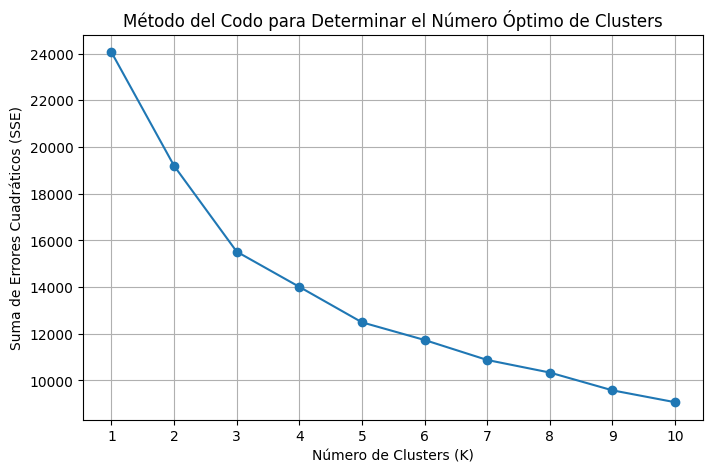

In [12]:
# determinamos el número óptimo de clusters usando el método del codo
sse = []  # inicializamos una lista vacía donde almacenaremos la suma de los errores cuadrados
k_values = range(1, 11)  # creamos un rango de valores de K (número de clusters) desde 1 hasta 10

for k in k_values:  # comenzamos un ciclo que recorrerá todos los valores de K en el rango
    kmeans = KMeans(n_clusters=k, random_state=42)  # creamos un objeto KMeans con el valor actual de K y un estado aleatorio fijo
    kmeans.fit(X_scaled)  # ajustamos el modelo KMeans con los datos escalados (X_scaled)
    sse.append(kmeans.inertia_)  # agregamos la suma de los errores cuadrados (inercia) del modelo al final de la lista 'sse'

# graficamos el método del codo
plt.figure(figsize=(8, 5))  # creamos una nueva figura de la gráfica con un tamaño específico
plt.plot(k_values, sse, marker='o')  # graficamos los valores de K contra el SSE
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')  # título a la gráfica
plt.xlabel('Número de Clusters (K)')  # etiqueta del eje X 
plt.ylabel('Suma de Errores Cuadráticos (SSE)')  # etiqueta del eje Y 
plt.xticks(k_values)  # configuramos las etiquetas del eje X
plt.grid()  # mostramos una cuadrícula 
plt.show()  # mostramos el grafico


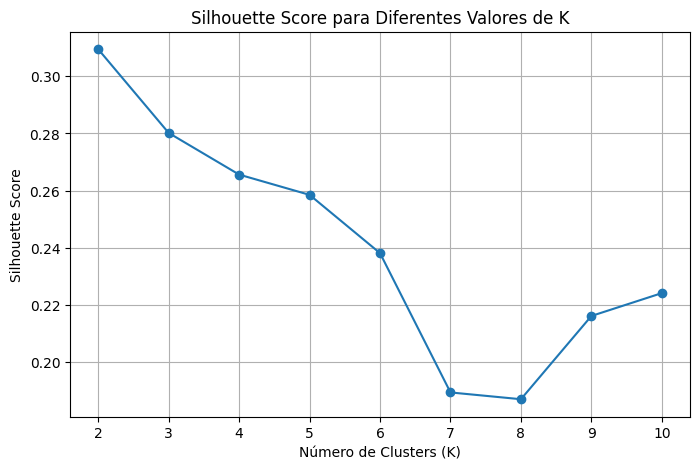

In [13]:
silhouette_scores = []  # inicializamos una lista vacía donde almacenaremos los scores de Silhouette

for k in range(2, 11):  # comenzamos un ciclo que recorrerá los valores de K desde 2 hasta 10 
    kmeans = KMeans(n_clusters=k, random_state=42)  # creamos un objeto KMeans con el valor actual de K y un estado aleatorio fijo 
    labels = kmeans.fit_predict(X_scaled)  # ajustamos el modelo KMeans con los datos escalados y obtenemos las etiquetas de los clusters asignados
    silhouette_scores.append(silhouette_score(X_scaled, labels))  # calculamos el silhouette score para los clusters obtenidos 

plt.figure(figsize=(8, 5))  # creamos una nueva figura 
plt.plot(range(2, 11), silhouette_scores, marker='o')  # graficamos los valores de K contra los silhouette scores
plt.title('Silhouette Score para Diferentes Valores de K')  # damos un título a la gráfica
plt.xlabel('Número de Clusters (K)')  # etiquetamos el eje X 
plt.ylabel('Silhouette Score')  # etiquetamos el eje Y
plt.xticks(range(2, 11))  # configuramos las etiquetas del eje X 
plt.grid()  # mostramos una cuadrícula en la gráfica para mejorar la lectura
plt.show()  # mostramos la gráfica

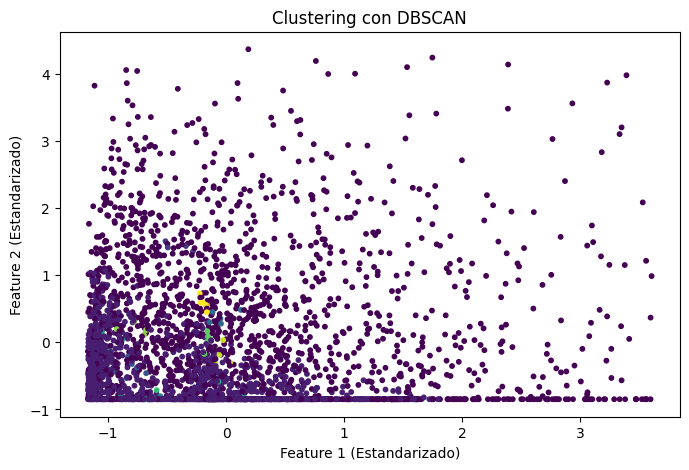

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # creamos un objeto DBSCAN 
dbscan_labels = dbscan.fit_predict(X_scaled)  # ajustamos el modelo DBSCAN a los datos escalados 

plt.figure(figsize=(8, 5))  # creamos una nueva figura de tamaño 8x5
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=10)  # graficamos los puntos de los datos
plt.title('Clustering con DBSCAN')  # damos un título a la gráfica
plt.xlabel('Feature 1 (Estandarizado)')  # etiquetamos el eje X 
plt.ylabel('Feature 2 (Estandarizado)')  # etiquetamos el eje Y 
plt.show()  # mostramos la gráfica

### 4. Comparación mediante métricas:
  * Calcula y compara las siguientes métricas de evaluación para ambos algoritmos:
    * Silhouette Score: Esta métrica mide cuán similares son los puntos dentro del mismo cluster en comparación con los puntos de otros clusters.
    * Calinski-Harabasz Index: Esta métrica evalúa la dispersión entre los clusters y dentro de ellos, con mayores valores indicando una mejor definición de clusters.
  * Visualiza ambos agrupamientos utilizando gráficos de dispersión para comparar visualmente cómo K-means y DBSCAN dividen los datos.

In [15]:
ch_index_kmeans = calinski_harabasz_score(X_scaled, kmeans.labels_)  # calculamos el índice de Calinski-Harabasz para el modelo KMeans

if len(set(dbscan_labels)) > 1:  # verificamos si DBSCAN ha encontrado más de un cluster 
    ch_index_dbscan = calinski_harabasz_score(X_scaled, dbscan_labels)  # si hay más de un cluster, calculamos el índice de Calinski-Harabasz para DBSCAN
else:
    ch_index_dbscan = None  # si solo se encuentra un cluster o solo hay ruido, asignamos None ya que el índice no tiene sentido en ese caso

print(f'Calinski-Harabasz Index para K-means: {ch_index_kmeans}')  # mostramos el índice de Calinski-Harabasz para el modelo KMeans
print(f'Calinski-Harabasz Index para DBSCAN: {ch_index_dbscan}')  # mostramos el índice de Calinski-Harabasz para el modelo DBSCAN

Calinski-Harabasz Index para K-means: 551.1955897785347
Calinski-Harabasz Index para DBSCAN: 40.013413067456575


### 5. Interpretación de resultados:


* Interpretación: Los datos se agrupan de manera efectiva y el modelo está generando clusters significativos con buena separación entre ellos.

* DBSCAN no ha encontrado clusters lo suficientemente densos o bien separados. 

* Puede que haya muchos puntos marcados como ruido o que los parámetros de DBSCAN (como eps o min_samples) no sean los adecuados para los datos. Es posible que DBSCAN haya tenido dificultades para detectar estructuras densas en los datos, o que los datos no tengan suficiente densidad para formar buenos clusters.

* K-means tiene un rendimiento significativamente mejor según el índice Calinski-Harabasz, lo que indica que el número de clusters y la forma en que los puntos están agrupados son más coherentes.